In [1]:
import numpy as np
import pandas as pd
import os

## Fetching Training Files

In [2]:
# fetching file from train dataset box_transcript_labels
path = '/home/jatin/Infrrd_Assignment/dataset/train/boxes_transcripts_labels'
dir_list = os.listdir(path)
print(dir_list)

['5699060b-563b-4d0f-ba2a-18715a6ed9e7_document-2_page-1.tsv', 'ebbcffa9-deba-45a9-bbf6-dd17ef362249_document-4_page-1.tsv', 'e8862a2b-6079-47d1-86ee-ee716e252f84_document-2_page-1.tsv', '180a608b-321d-418b-9643-5ca2bc934dcb_document-1_page-1.tsv', 'b07db877-5f71-4af2-be8b-8d17d10aaece_document-7_page-1.tsv', 'ed017ee4-9a91-40ad-9867-e85ebb4c0d77_document-5_page-1.tsv', 'a3283f46-84e8-46db-a456-44e2d4c5e256_document-6_page-1.tsv', '5c2f28f0-172b-4d27-929f-21c9cac4f2c9_document-7_page-1.tsv', '9acb0929-5efa-47b2-b81f-2b4c4efec897_document-6_page-1.tsv', '3cfcc912-7587-4c89-8b2f-b0b573abf658_document-9_page-1.tsv', '7dd13ad2-a479-434a-b92b-aae74336f438_document-6_page-1.tsv', 'd6689c00-7936-40d5-a3ef-902d8a5fa56a_document-5_page-1.tsv', '4031dfae-5c16-4513-af30-4795079ca20e_document-2_page-1.tsv', 'cec4e511-db50-4bde-b237-9fd2dc1bc52a_document-3_page-1.tsv', '54b45f44-2869-41dc-babc-2c27b977353f_document-9_page-1.tsv', 'd9017fac-dd95-4981-8670-ca8cf6e2b838_document-2_page-1.tsv', 'ad080f

## Extracting Training Data

In [3]:
count = 0
list1 = list()
for name in dir_list:
    loc = '/home/jatin/Infrrd_Assignment/dataset/train/boxes_transcripts_labels/'+name
    df = pd.read_csv(loc,header=None)
    df.columns = ['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right','transcript','field']
    mask = df['field'] == 'OTHER'
    df = df[~mask]
    df = df.iloc[:,[-2,-1]]
    df = df.reset_index()
    df.drop(columns=['index'],inplace=True)
    df = df.groupby(['field'])['transcript'].apply(' '.join).reset_index()
    df = df.set_index('field')
    df = df.T
    new_columns = ['employerName','employerAddressStreet_name','employerAddressCity','employerAddressState','employerAddressZip','einEmployerIdentificationNumber','employeeName'
,'ssnOfEmployee','box1WagesTipsAndOtherCompensations','box2FederalIncomeTaxWithheld','box3SocialSecurityWages','box4SocialSecurityTaxWithheld','box16StateWagesTips','box17StateIncomeTax'
,'taxYear']
    df = df.reindex(columns=new_columns)
    arr = list(df.loc['transcript'].values)
    list1.append(arr)

train_dataframe = pd.DataFrame(list1,columns=new_columns)
train_dataframe

    

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571 . 07,50219 . 14,180256.5,13789. 62,118916 . 12,7477 . 28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081 .48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,138 89 . 11,88282 .45,6753. 61,37532 83,2775 .2,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,137908-53,10550.0,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631 .58,36172 . 8,253646.73,19403 .97,101515. 79,11831 .66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625. 39,35884.32,200379 . 52,15329 . 03,99246 . 64,10098 . 15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464 . 93,77307. 24,198314.2,15171 . 04,123217 . 09,6068. 69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,. 63644 41,19040.33,. 70927 46,5425.95,34905 43,3220 73,2019


In [4]:
length = len(train_dataframe)
row_with_nan = length-len(train_dataframe.dropna())

In [5]:
(row_with_nan/length)*100 # Percentage of drop rows

51.0

# Insight
    1. Since 51% of rows are NaN, hence can't delete all rows.
    2. Assuming the TipsAndOtherCompensations, FederalIncomeTaxWithheld, SocialSecurityWages, SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax by mean.

In [6]:
train_dataframe.dtypes

employerName                          object
employerAddressStreet_name            object
employerAddressCity                   object
employerAddressState                  object
employerAddressZip                    object
einEmployerIdentificationNumber       object
employeeName                          object
ssnOfEmployee                         object
box1WagesTipsAndOtherCompensations    object
box2FederalIncomeTaxWithheld          object
box3SocialSecurityWages               object
box4SocialSecurityTaxWithheld         object
box16StateWagesTips                   object
box17StateIncomeTax                   object
taxYear                               object
dtype: object

In [7]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

def to_float(text):
    number = text
    if isnan(number):
        return np.NaN
    if '.' in number or '-' in number:
        count = 0
        r = number.split('.')
        if len(r):
            if r[0] == 'nan':
                return np.NaN
            else:
                temp = ""
                for i in r:
                    temp += i.strip()
                    if count == 0:
                        temp += '.'
                        count += 1
        else:
            r = number.splits('-')
            if len(r):
                if r[0] == 'nan' or r[0] == 'NaN':
                    return np.NaN
                else:
                    temp = ""
                    for i in r:
                        temp += i.strip()
                        if count == 0:
                            temp += '.'
                            count += 1
        try:
            return float(temp)
        except ValueError:
            return np.NaN


In [8]:
train_dataframe['box1WagesTipsAndOtherCompensations'].apply(lambda x: to_float(str(x)))

0      247571.07
1            NaN
2      186876.35
3            NaN
4      170401.23
         ...    
595    219631.58
596    196625.39
597    224464.93
598          NaN
599    221413.09
Name: box1WagesTipsAndOtherCompensations, Length: 600, dtype: float64

In [9]:
train_dataframe['box1WagesTipsAndOtherCompensations']=train_dataframe['box1WagesTipsAndOtherCompensations'].apply(lambda x: to_float(str(x)))

In [10]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.07,50219 . 14,180256.5,13789. 62,118916 . 12,7477 . 28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081 .48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,138 89 . 11,88282 .45,6753. 61,37532 83,2775 .2,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,137908-53,10550.0,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.58,36172 . 8,253646.73,19403 .97,101515. 79,11831 .66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.39,35884.32,200379 . 52,15329 . 03,99246 . 64,10098 . 15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.93,77307. 24,198314.2,15171 . 04,123217 . 09,6068. 69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,NaN,19040.33,. 70927 46,5425.95,34905 43,3220 73,2019


In [11]:
col = ['box1WagesTipsAndOtherCompensations','box2FederalIncomeTaxWithheld','box3SocialSecurityWages','box4SocialSecurityTaxWithheld','box16StateWagesTips','box17StateIncomeTax']
for t in col:
    train_dataframe[t]=train_dataframe[t].apply(lambda x: to_float(str(x)))

In [12]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.07,50219.14,180256.50,13789.62,118916.12,7477.28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081.48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,NaN,88282.45,6753.61,NaN,2775.20,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,NaN,10550.00,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.58,36172.80,253646.73,19403.97,101515.79,11831.66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.39,35884.32,200379.52,15329.03,99246.64,10098.15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.93,77307.24,198314.20,15171.04,123217.09,6068.69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,NaN,19040.33,NaN,5425.95,NaN,NaN,2019


In [13]:
for t in col:
   avg = train_dataframe[t].mean()
   train_dataframe[t]=train_dataframe[t].apply(lambda x:  avg if isnan(x) else x) # more than 5% of data are none, hence replace by mean

In [14]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.070000,50219.140000,180256.50000,13789.620000,118916.120000,7477.280000,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,145462.699002,32481.618319,271548.23000,10954.561706,72132.753857,5391.972987,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.350000,61783.770000,223287.32000,17081.480000,72132.753857,9258.080000,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,145462.699002,32481.618319,88282.45000,6753.610000,72132.753857,2775.200000,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.230000,23526.270000,144882.13118,10550.000000,83795.310000,5470.950000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.580000,36172.800000,253646.73000,19403.970000,101515.790000,11831.660000,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.390000,35884.320000,200379.52000,15329.030000,99246.640000,10098.150000,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.930000,77307.240000,198314.20000,15171.040000,123217.090000,6068.690000,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,145462.699002,19040.330000,144882.13118,5425.950000,72132.753857,5391.972987,2019


In [15]:
train_dataframe['taxYear'].value_counts()

taxYear
2018     396
2019     147
2910       1
20 18      1
Name: count, dtype: int64

In [16]:
def check_year(year):
    year = str(year)
    if year == 'nan':
        return 'NaN'
    if ' ' in year:
        year = year.replace(' ','')
        return int(year)
    elif year == '2910':
        return int('2019')
    else:
        return int(year)

In [17]:
train_dataframe['taxYear'] = train_dataframe['taxYear'].apply(lambda x: check_year(x))

train_dataframe['taxYear'].value_counts()


taxYear
2018    397
2019    148
NaN      55
Name: count, dtype: int64

In [18]:
indexs = train_dataframe[train_dataframe['taxYear']=='NaN'].index
train_dataframe=train_dataframe.drop(index=indexs) # 9 % of data are NaN
train_dataframe=train_dataframe.reset_index()
train_dataframe.drop(columns=['index'],inplace=True)
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.070000,50219.140000,180256.50000,13789.620000,118916.120000,7477.280000,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,145462.699002,32481.618319,271548.23000,10954.561706,72132.753857,5391.972987,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.350000,61783.770000,223287.32000,17081.480000,72132.753857,9258.080000,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,145462.699002,32481.618319,88282.45000,6753.610000,72132.753857,2775.200000,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.230000,23526.270000,144882.13118,10550.000000,83795.310000,5470.950000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.580000,36172.800000,253646.73000,19403.970000,101515.790000,11831.660000,2019
541,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.390000,35884.320000,200379.52000,15329.030000,99246.640000,10098.150000,2018
542,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.930000,77307.240000,198314.20000,15171.040000,123217.090000,6068.690000,2019
543,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,145462.699002,19040.330000,144882.13118,5425.950000,72132.753857,5391.972987,2019


In [19]:
train_dataframe['taxYear']=train_dataframe['taxYear'].astype('int')

In [20]:
new_df = train_dataframe[col]
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,247571.070000,50219.140000,180256.50000,13789.620000,118916.120000,7477.280000
1,145462.699002,32481.618319,271548.23000,10954.561706,72132.753857,5391.972987
2,186876.350000,61783.770000,223287.32000,17081.480000,72132.753857,9258.080000
3,145462.699002,32481.618319,88282.45000,6753.610000,72132.753857,2775.200000
4,170401.230000,23526.270000,144882.13118,10550.000000,83795.310000,5470.950000
...,...,...,...,...,...,...
540,219631.580000,36172.800000,253646.73000,19403.970000,101515.790000,11831.660000
541,196625.390000,35884.320000,200379.52000,15329.030000,99246.640000,10098.150000
542,224464.930000,77307.240000,198314.20000,15171.040000,123217.090000,6068.690000
543,145462.699002,19040.330000,144882.13118,5425.950000,72132.753857,5391.972987


In [21]:
new_df.corr() # correlation

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
box1WagesTipsAndOtherCompensations,1.000000,0.670854,0.773054,0.795683,0.798313,0.592207
box2FederalIncomeTaxWithheld,0.670854,1.000000,0.586305,0.591371,0.606193,0.448293
box3SocialSecurityWages,0.773054,0.586305,1.000000,0.883120,0.713058,0.548985
box4SocialSecurityTaxWithheld,0.795683,0.591371,0.883120,1.000000,0.762422,0.565355
box16StateWagesTips,0.798313,0.606193,0.713058,0.762422,1.000000,0.610917
box17StateIncomeTax,0.592207,0.448293,0.548985,0.565355,0.610917,1.000000


<Axes: >

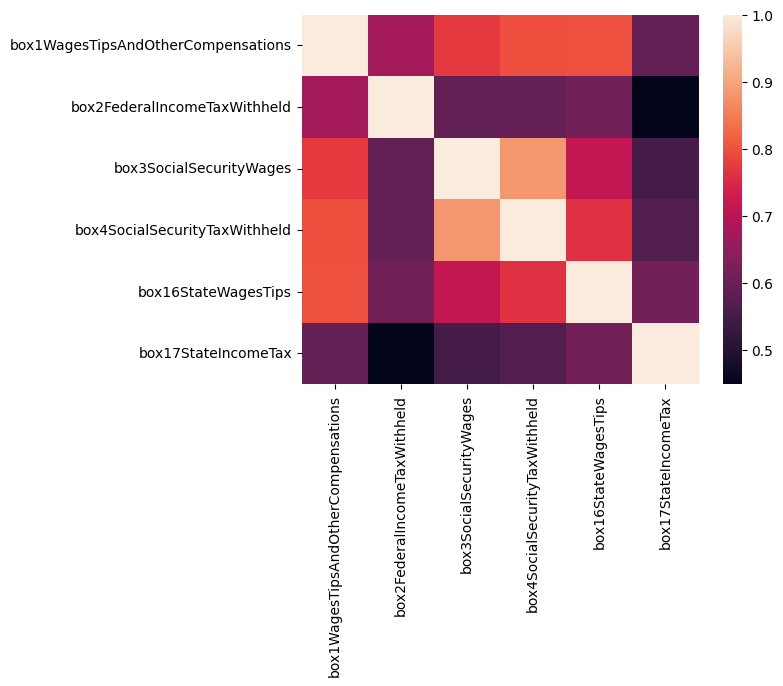

In [22]:
import seaborn as sns
sns.heatmap(new_df.corr())

<Axes: xlabel='box17StateIncomeTax', ylabel='Density'>

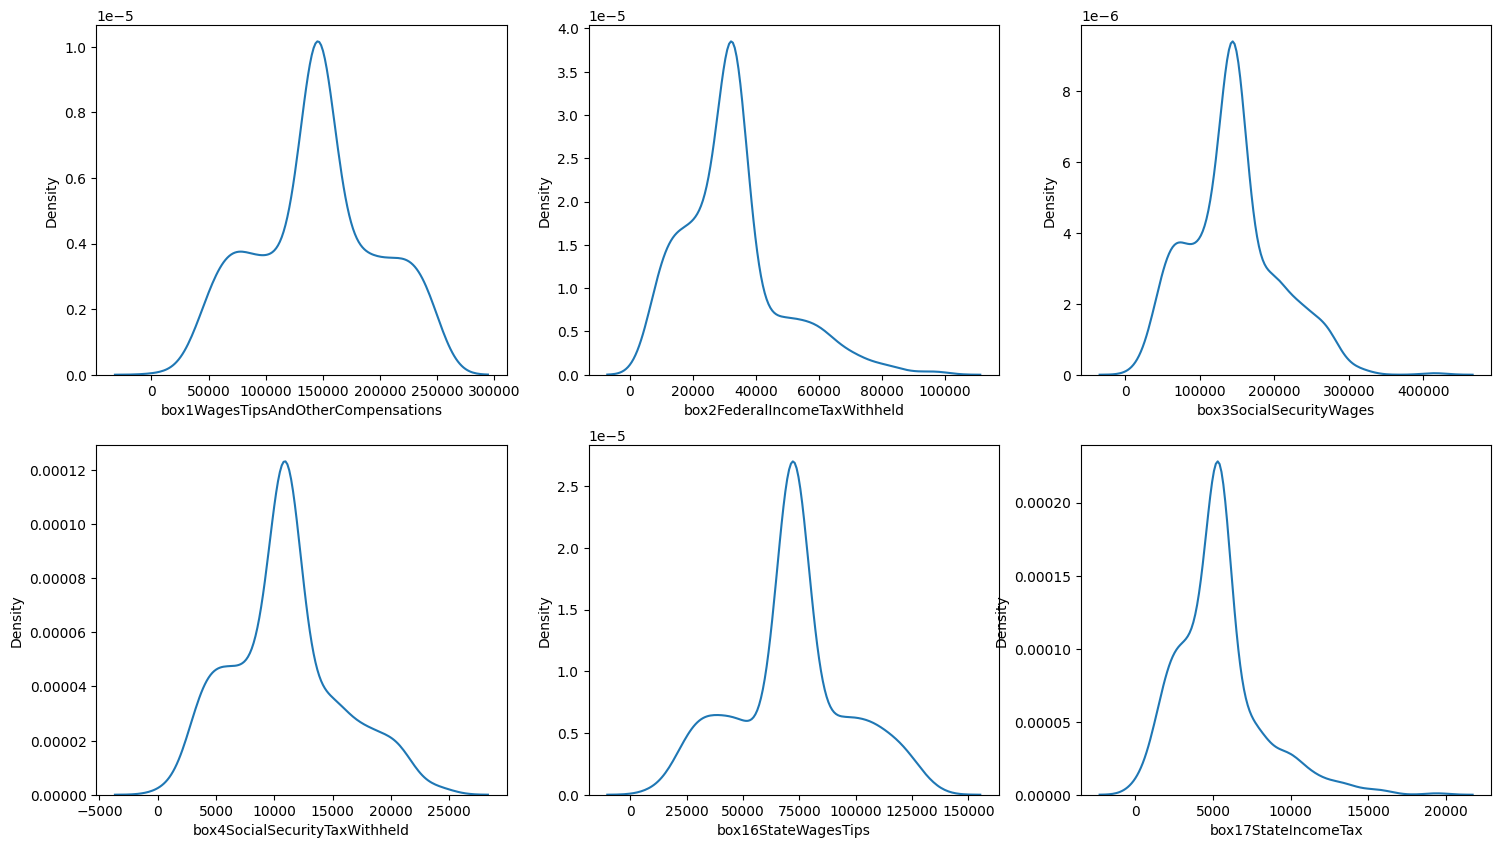

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.kdeplot(ax=axes[0, 0], data=new_df, x=col[0])
sns.kdeplot(ax=axes[0, 1], data=new_df, x=col[1]) # not normalised
sns.kdeplot(ax=axes[0, 2], data=new_df, x=col[2]) # not normalised
sns.kdeplot(ax=axes[1, 0], data=new_df, x=col[3])
sns.kdeplot(ax=axes[1, 1], data=new_df, x=col[4])
sns.kdeplot(ax=axes[1, 2], data=new_df, x=col[5]) # not normalised

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(new_df)

# transform train and test sets
new_df = scaler.transform(new_df)

In [25]:
new_df

array([[0.99125592, 0.47984374, 0.41018826, 0.56072184, 0.87722325,
        0.3847281 ],
       [0.56006399, 0.28577869, 0.63965092, 0.44308285, 0.49708792,
        0.27730982],
       [0.73494909, 0.60637158, 0.51834665, 0.69731552, 0.49708792,
        0.47646062],
       ...,
       [0.89368135, 0.77621284, 0.45557647, 0.618043  , 0.91217052,
        0.31216885],
       [0.56006399, 0.13871845, 0.32127444, 0.21367655, 0.49708792,
        0.27730982],
       [0.88079378, 0.18332365, 0.32127444, 0.68748675, 0.7579883 ,
        0.23229386]])

In [26]:
new_df = pd.DataFrame(new_df,columns=col)
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,0.991256,0.479844,0.410188,0.560722,0.877223,0.384728
1,0.560064,0.285779,0.639651,0.443083,0.497088,0.277310
2,0.734949,0.606372,0.518347,0.697316,0.497088,0.476461
3,0.560064,0.285779,0.179011,0.268767,0.497088,0.142515
4,0.665377,0.187799,0.321274,0.426296,0.591851,0.281378
...,...,...,...,...,...,...
540,0.873271,0.326164,0.594655,0.793686,0.735838,0.609031
541,0.776118,0.323007,0.460768,0.624599,0.717400,0.519734
542,0.893681,0.776213,0.455576,0.618043,0.912171,0.312169
543,0.560064,0.138718,0.321274,0.213677,0.497088,0.277310


## Outler Removal

In [27]:
before_dataframe = new_df.copy()

In [28]:
def outlier_removal(new_df):
    for i in range(len(col)):
        Q1 = new_df[col[i]].quantile(0.25)
        Q3 = new_df[col[i]].quantile(0.75)
        iqr =  Q3-Q1
        lower_limit = Q1-1.5*iqr
        upper_limit = Q3 + 1.5*iqr
        new_df[col[i]] = np.where(
            new_df[col[i]] > upper_limit,
            upper_limit,
            np.where(
                new_df[col[i]] < lower_limit,
                lower_limit,
                new_df[col[i]]
            )
        )
        plt.figure(figsize=(16,8))
        plt.subplot(2,2,1)
        sns.histplot(before_dataframe[col[i]],kde=True,stat='probability',legend=True)
        plt.title('Before Outlier Removal')


        plt.subplot(2,2,2)
        sns.histplot(new_df[col[i]],kde=True,stat='probability',legend=True)
        plt.title('After Outlier Removal')


        plt.show()

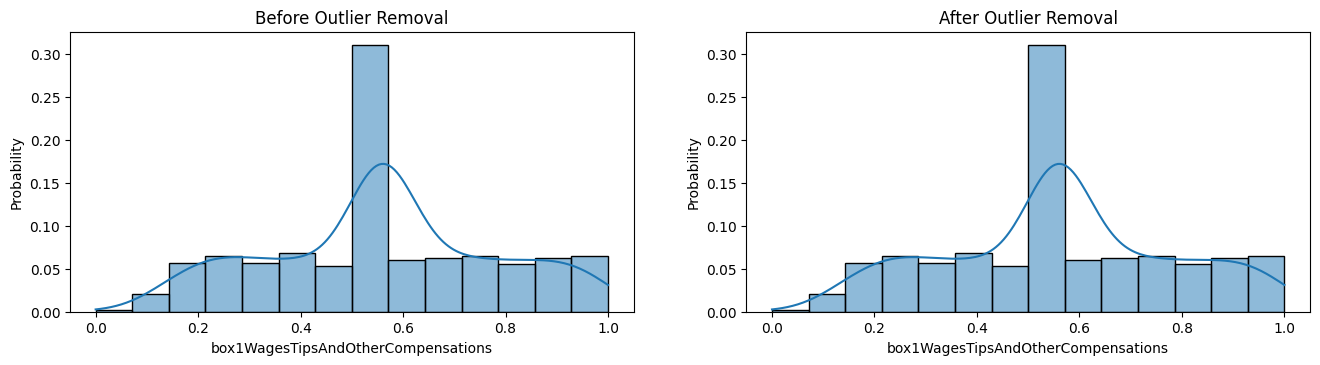

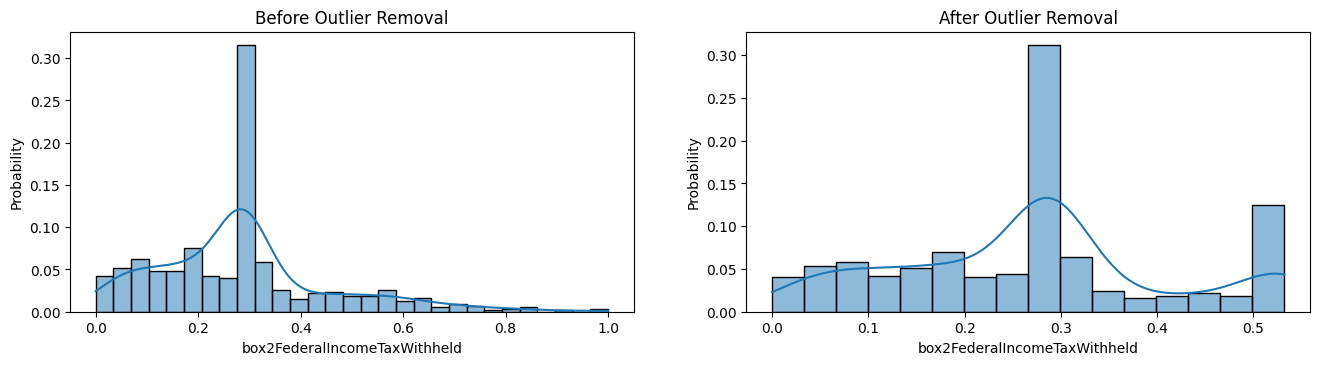

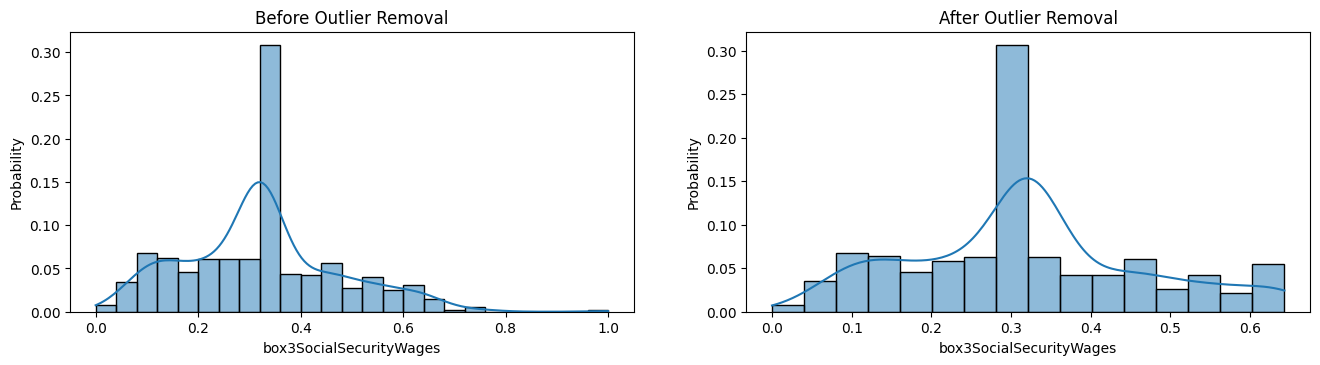

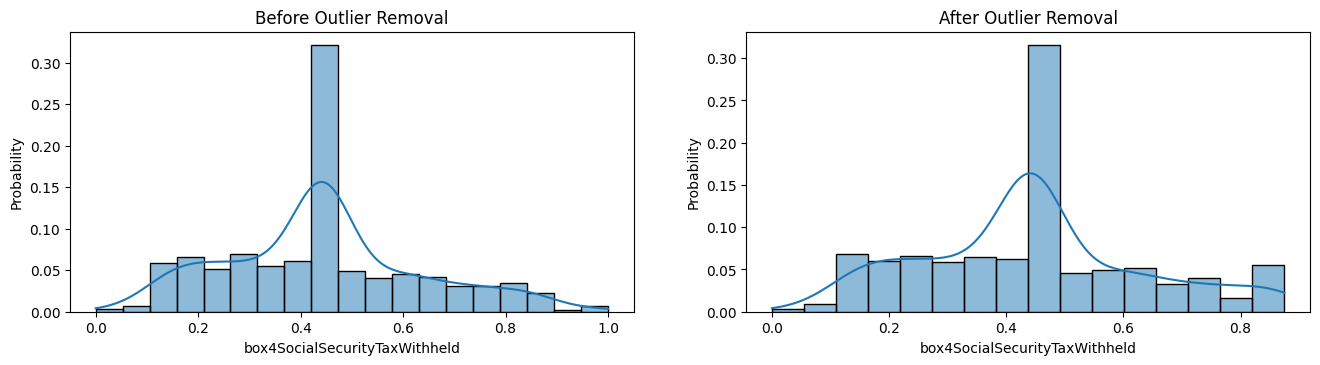

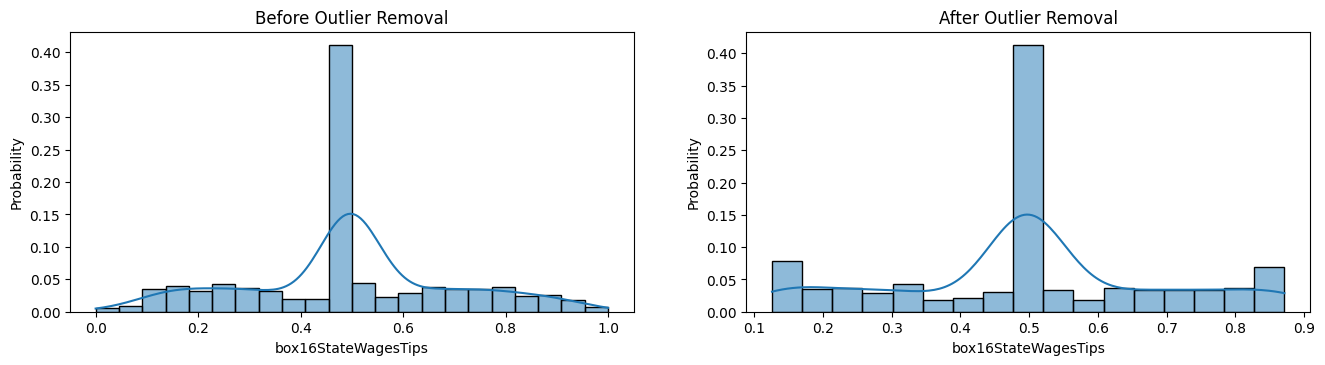

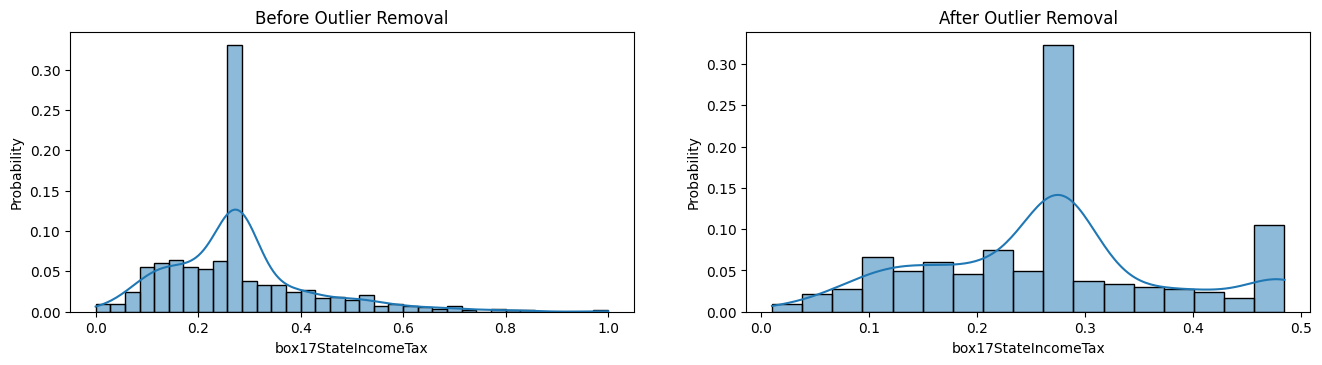

In [29]:
outlier_removal(new_df)

In [30]:
sns.pairplot(new_df)
plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

In [ ]:
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,0.991256,0.479844,0.410188,0.560722,0.871470,0.384728
1,0.560064,0.285779,0.639651,0.443083,0.497088,0.277310
2,0.734949,0.532212,0.518347,0.697316,0.497088,0.476461
3,0.560064,0.285779,0.179011,0.268767,0.497088,0.142515
4,0.665377,0.187799,0.321274,0.426296,0.591851,0.281378
...,...,...,...,...,...,...
540,0.873271,0.326164,0.594655,0.793686,0.735838,0.484468
541,0.776118,0.323007,0.460768,0.624599,0.717400,0.484468
542,0.893681,0.532212,0.455576,0.618043,0.871470,0.312169
543,0.560064,0.138718,0.321274,0.213677,0.497088,0.277310


## In-Sight
   1. Looking into Pair Polt we can estimate that there are linear relationship amonf features like 
   2. box4SocialSecurityTaxWithheld vs box16StateWagesTips
   3. box1WagesTipsAndOtherCompensations vs  box16StateWagesTips etc..

In [ ]:
new_df['taxYear'] = train_dataframe['taxYear']
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,0.991256,0.479844,0.410188,0.560722,0.871470,0.384728,2018
1,0.560064,0.285779,0.639651,0.443083,0.497088,0.277310,2018
2,0.734949,0.532212,0.518347,0.697316,0.497088,0.476461,2018
3,0.560064,0.285779,0.179011,0.268767,0.497088,0.142515,2018
4,0.665377,0.187799,0.321274,0.426296,0.591851,0.281378,2018
...,...,...,...,...,...,...,...
540,0.873271,0.326164,0.594655,0.793686,0.735838,0.484468,2019
541,0.776118,0.323007,0.460768,0.624599,0.717400,0.484468,2018
542,0.893681,0.532212,0.455576,0.618043,0.871470,0.312169,2019
543,0.560064,0.138718,0.321274,0.213677,0.497088,0.277310,2019


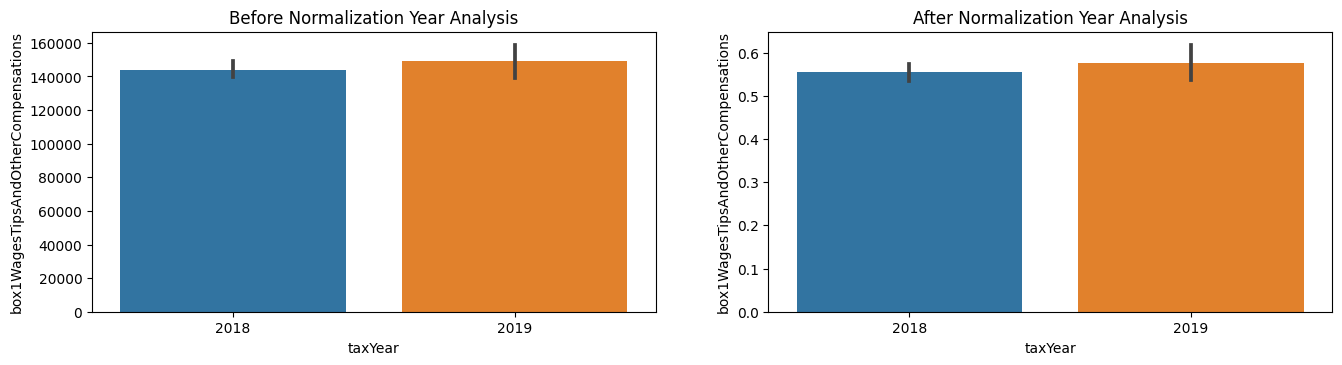

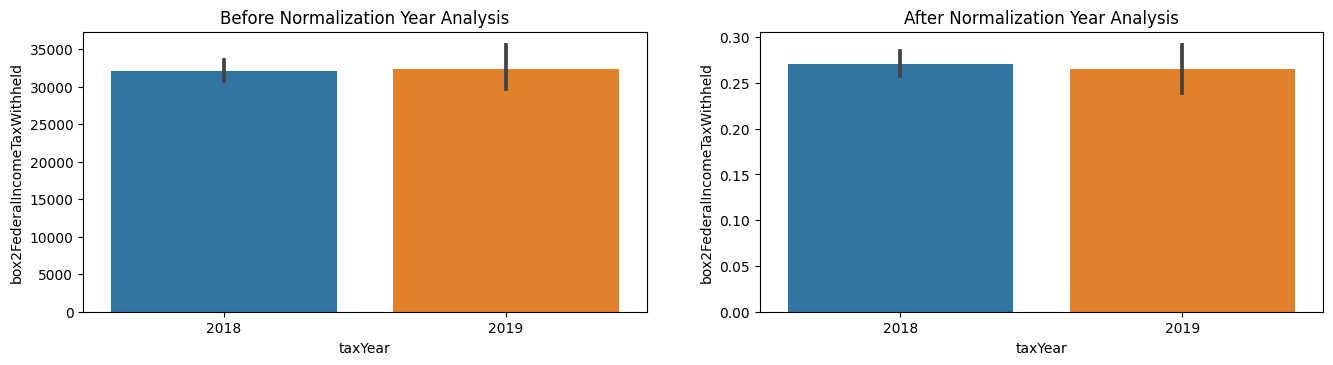

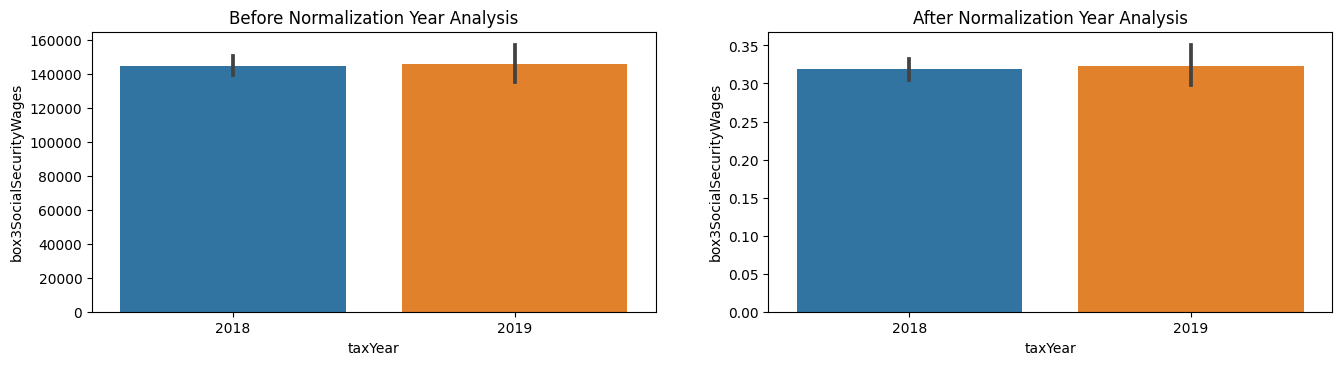

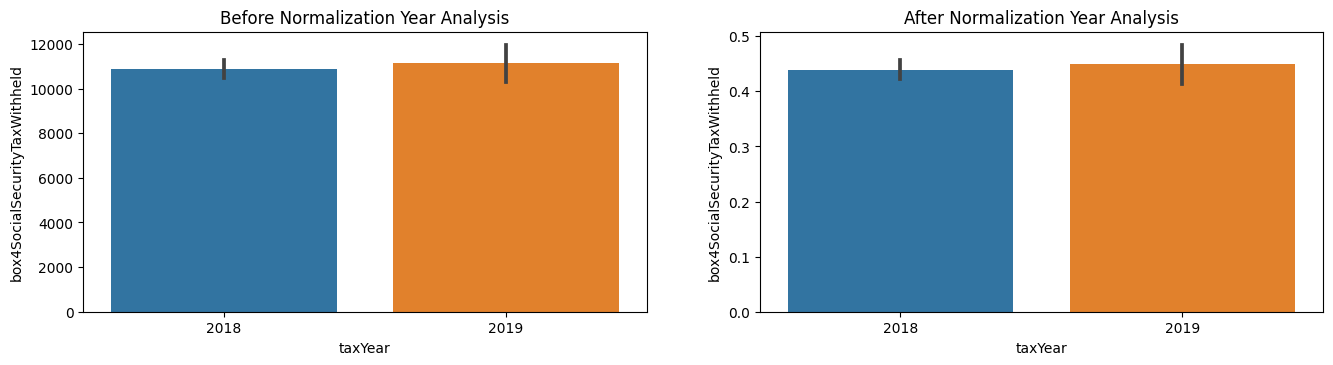

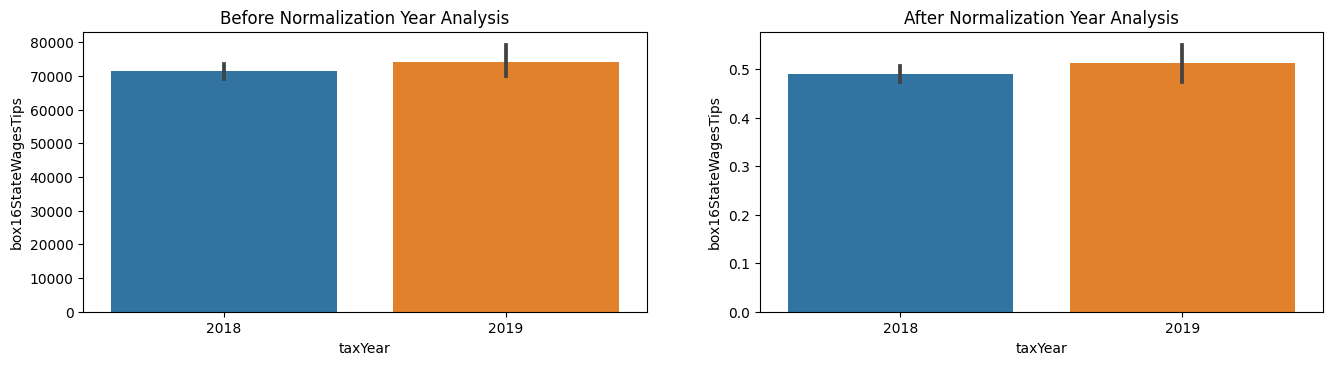

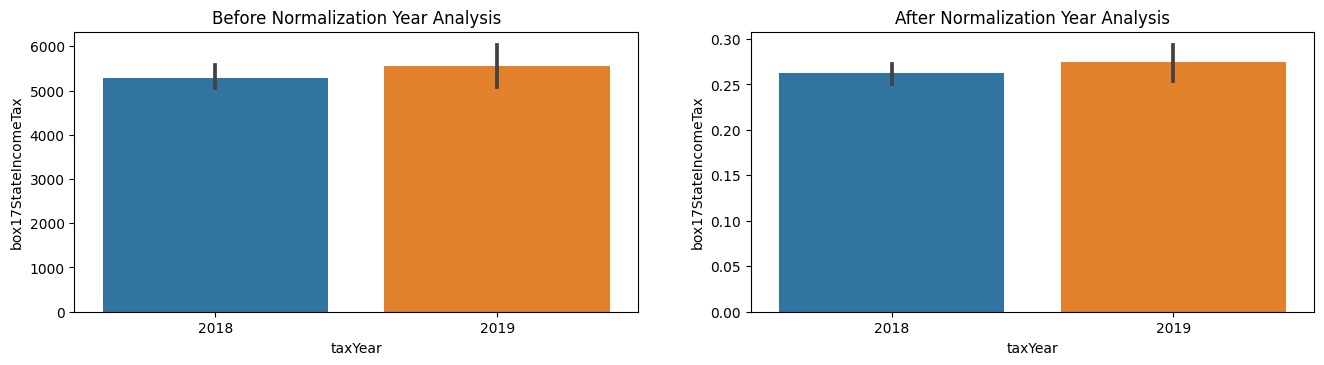

In [ ]:
for  i in range(len(col)):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.barplot(data=train_dataframe,x='taxYear', y= col[i])
    plt.title('Before Normalization Year Analysis')


    plt.subplot(2,2,2)
    sns.barplot(data=new_df,x='taxYear', y= col[i])
    plt.title('After Normalization Year Analysis')

    plt.show()


In [ ]:
org_dataframe = pd.DataFrame(columns=['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right','transcript','field'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in range(0,len(dir_list)):
    name = dir_list[i]
    loc = '/home/jatin/Infrrd_Assignment/dataset/train/boxes_transcripts_labels/'+name
    df = pd.read_csv(loc,header=None)
    df.columns = ['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right','transcript','field']
    # temp_df = pd.DataFrame(df,columns=['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right'])

    # scaler = MinMaxScaler()

    # # fit the scaler to the train set, it will learn the parameters
    # scaler.fit(temp_df)

    # # transform train and test sets
    # temp_df = scaler.transform(temp_df)
    temp_df = pd.DataFrame(df,columns=['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right'])
    temp_df['transcript'] = df['transcript']
    temp_df['field'] = df['field']
    org_dataframe = pd.concat([org_dataframe, temp_df])

In [ ]:
org_dataframe

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,5,10,99,20,147,34,"Wages,",OTHER
1,12,16,149,21,177,34,"tips,",OTHER
2,18,22,180,21,215,34,other,OTHER
3,24,28,217,21,257,35,comp.,OTHER
4,38,38,323,19,334,34,2,OTHER
...,...,...,...,...,...,...,...,...
521,10832,10834,110,1622,137,1639,the,OTHER
522,10836,10839,140,1622,180,1639,back,OTHER
523,10841,10842,182,1622,200,1639,of,OTHER
524,10844,10847,202,1621,245,1639,Copy,OTHER


In [ ]:
org_dataframe = org_dataframe.reset_index()
org_dataframe.drop(columns=['index'],inplace=True)
org_dataframe

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,5,10,99,20,147,34,"Wages,",OTHER
1,12,16,149,21,177,34,"tips,",OTHER
2,18,22,180,21,215,34,other,OTHER
3,24,28,217,21,257,35,comp.,OTHER
4,38,38,323,19,334,34,2,OTHER
...,...,...,...,...,...,...,...,...
237611,10832,10834,110,1622,137,1639,the,OTHER
237612,10836,10839,140,1622,180,1639,back,OTHER
237613,10841,10842,182,1622,200,1639,of,OTHER
237614,10844,10847,202,1621,245,1639,Copy,OTHER


In [ ]:
fields = org_dataframe['field'].value_counts().index.to_list()

In [ ]:
fields

['OTHER',
 'employerAddressStreet_name',
 'employerName',
 'employeeName',
 'box2FederalIncomeTaxWithheld',
 'box1WagesTipsAndOtherCompensations',
 'box16StateWagesTips',
 'box17StateIncomeTax',
 'box4SocialSecurityTaxWithheld',
 'box3SocialSecurityWages',
 'employerAddressCity',
 'employerAddressZip',
 'employerAddressState',
 'taxYear',
 'einEmployerIdentificationNumber',
 'ssnOfEmployee']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(fields)
org_dataframe['field'] = le.transform(org_dataframe['field'])

In [ ]:
org_dataframe['field'].value_counts()

field
0     222548
11      2260
13      1954
8       1123
4       1106
3       1043
1       1043
2       1023
6       1009
5        979
9        840
12       572
10       552
15       546
7        542
14       476
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
org_dataframe.drop(columns=['transcript'],inplace=True)
X = org_dataframe.iloc[:,0:-1]
Y = org_dataframe.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right
189525,6598,6600,397,993,426,1019
77447,3052,3055,1993,815,2024,844
82858,1210,1212,1442,221,1463,243
128102,9671,9678,676,1379,740,1399
77345,1167,1169,1836,474,1857,497
...,...,...,...,...,...,...
119879,7370,7372,161,1182,182,1197
103694,3177,3178,1379,848,1409,877
131932,1619,1619,2205,1255,2221,1293
146867,183,185,1767,19,1836,58


In [ ]:
X_test

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right
216001,9196,9196,811,1457,821,1477
180970,356,363,438,124,492,138
131143,9269,9270,1659,2868,1708,2908
88828,326,334,1121,26,1182,45
168247,1999,2012,94,234,169,259
...,...,...,...,...,...,...
98031,533,535,1326,107,1379,130
216108,859,866,1106,107,1152,123
21688,2108,2115,1259,567,1327,587
16195,3187,3189,496,862,525,888


In [ ]:
Y_train

189525    0
77447     0
82858     0
128102    0
77345     0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: field, Length: 190092, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=2000)

lg.fit(X_train,Y_train)

/home/jatin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [ ]:
Y_pred = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
accuracy = accuracy_score(Y_test,Y_pred)
print('F1_Score:',f1_score(Y_test,Y_pred,average='weighted'))
print('Precision_Score:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall_Score:',recall_score(Y_test,Y_pred,average='weighted'))
print('Accuracy:',accuracy)

F1_Score: 0.9096169867551108
Precision_Score: 0.8872767665105523
Recall_Score: 0.9358008585135932
Accuracy: 0.9358008585135932


/home/jatin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.32)
dt.fit(X_train,Y_train)

Y_pred = dt.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred)
print('F1_Score:',f1_score(Y_test,Y_pred,average='weighted'))
print('Precision_Score:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall_Score:',recall_score(Y_test,Y_pred,average='weighted'))
print('Accuracy:',accuracy)


F1_Score: 0.9069879326598118
Precision_Score: 0.878561063589515
Recall_Score: 0.9373158825014729
Accuracy: 0.9373158825014729


/home/jatin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.mean(cross_val_score(dt,X_train,Y_train,cv=5,scoring='accuracy'))

0.9364044778765749

In [ ]:
np.mean(cross_val_score(dt,X_test,Y_test,cv=5,scoring='accuracy'))

0.9373158841616233

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(max_depth=5,min_impurity_decrease=0.32,n_estimators=500)
rt.fit(X_train,Y_train)

Y_pred = rt.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred)
print('F1_Score:',f1_score(Y_test,Y_pred,average='weighted'))
print('Precision_Score:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall_Score:',recall_score(Y_test,Y_pred,average='weighted'))
print('Accuracy:',accuracy)


F1_Score: 0.9069879326598118
Precision_Score: 0.878561063589515
Recall_Score: 0.9373158825014729
Accuracy: 0.9373158825014729


/home/jatin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Considering Logistic Regression from above for Validation Testing

In [ ]:
name = 'LogisticRegression.pickle'
pd.to_pickle(lg,name)

In [ ]:
name = 'DecisionTree.pickle'
pd.to_pickle(dt,name)